In [1]:
%pip install pandas networkx scipy loguru sklearn autograd openpyxl

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
import itertools as it 
os.chdir('..')
from src.data_cleaning import *
from src.autograd_mds import *
from autograd import grad, elementwise_grad 
from loguru import logger
import sys

from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from sklearn.manifold import MDS
# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings


In [3]:
morse_data = pd.read_excel("https://wiki.davidzeleny.net/lib/exe/fetch.php/numecol:data:morsecodes-dist-canoco.xlsx", index_col=0)

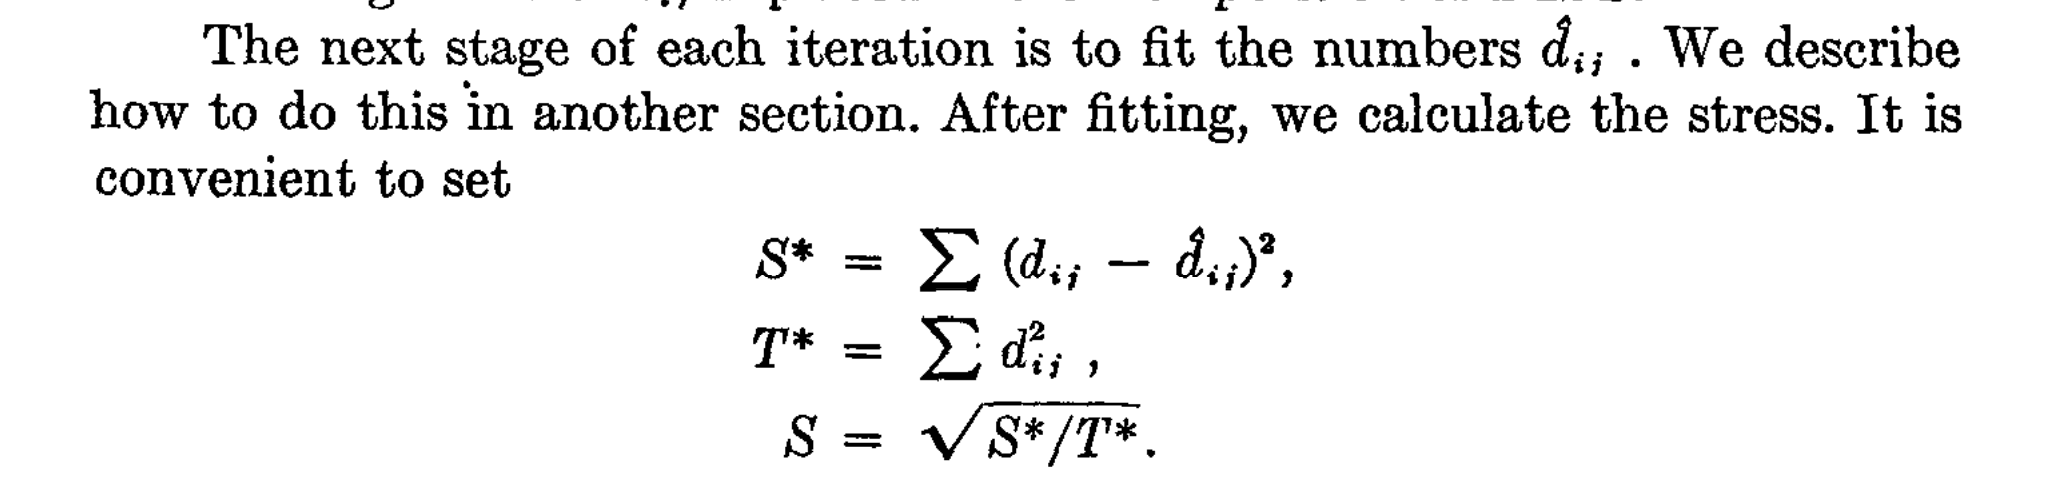
Stress Loss function from Kruskal, 1964

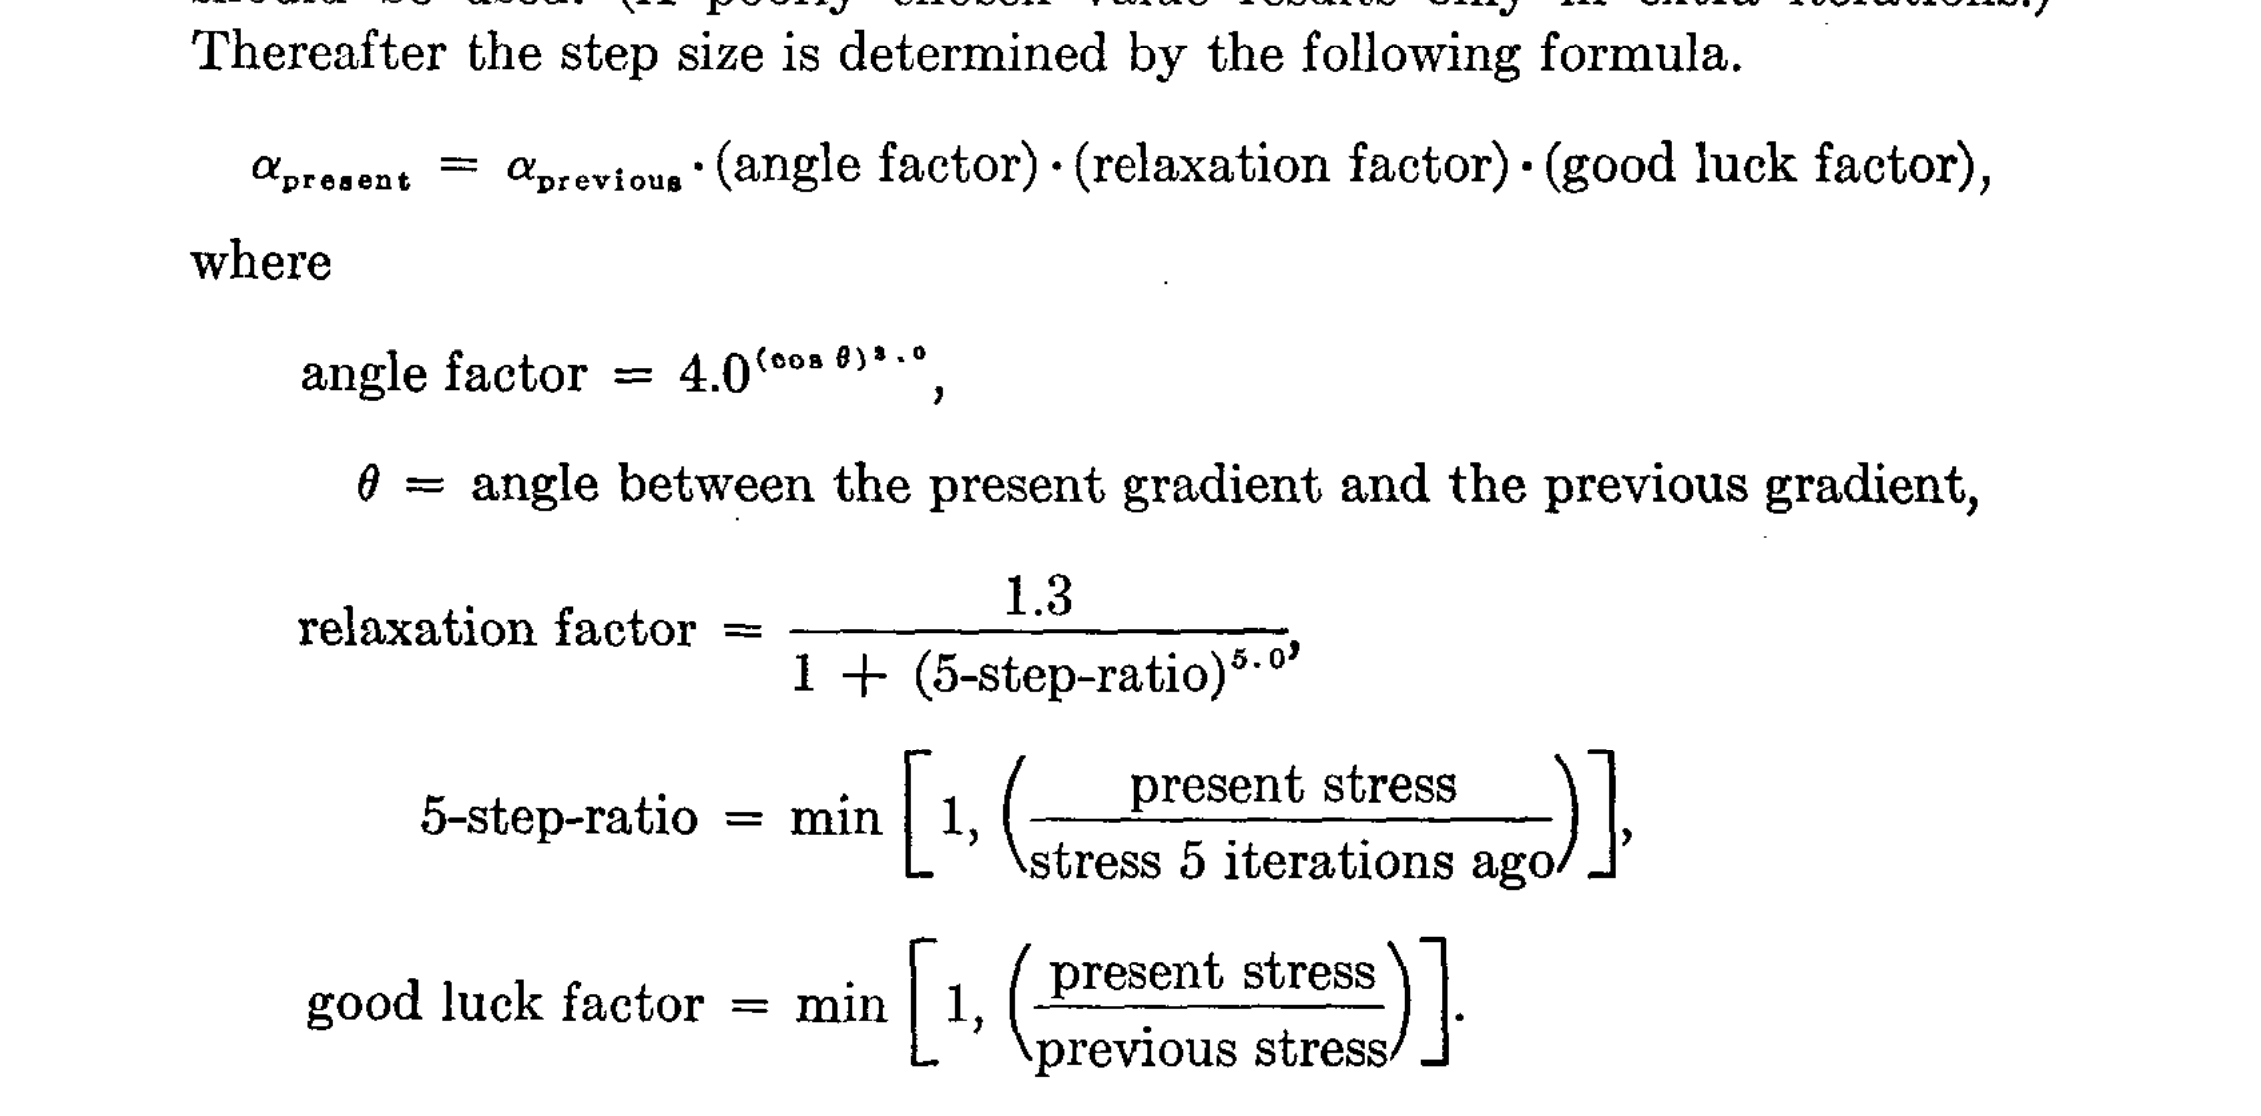
Optimizer from Kruskal, 1964

In [4]:
## Steps 
### Define configuration 
#### for each training iteration
#### normalize 
#### find pairwise distances
#### monotone regression
#### gradient descent



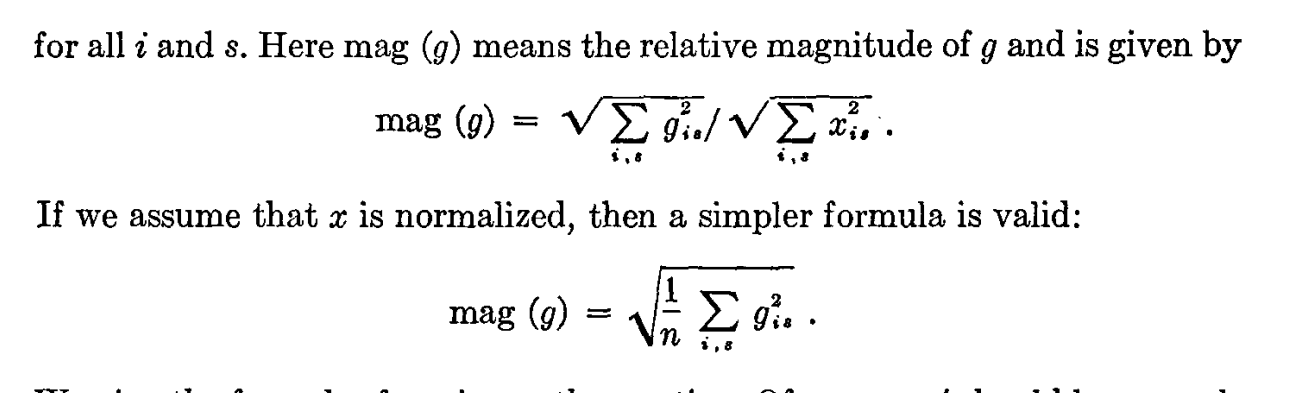

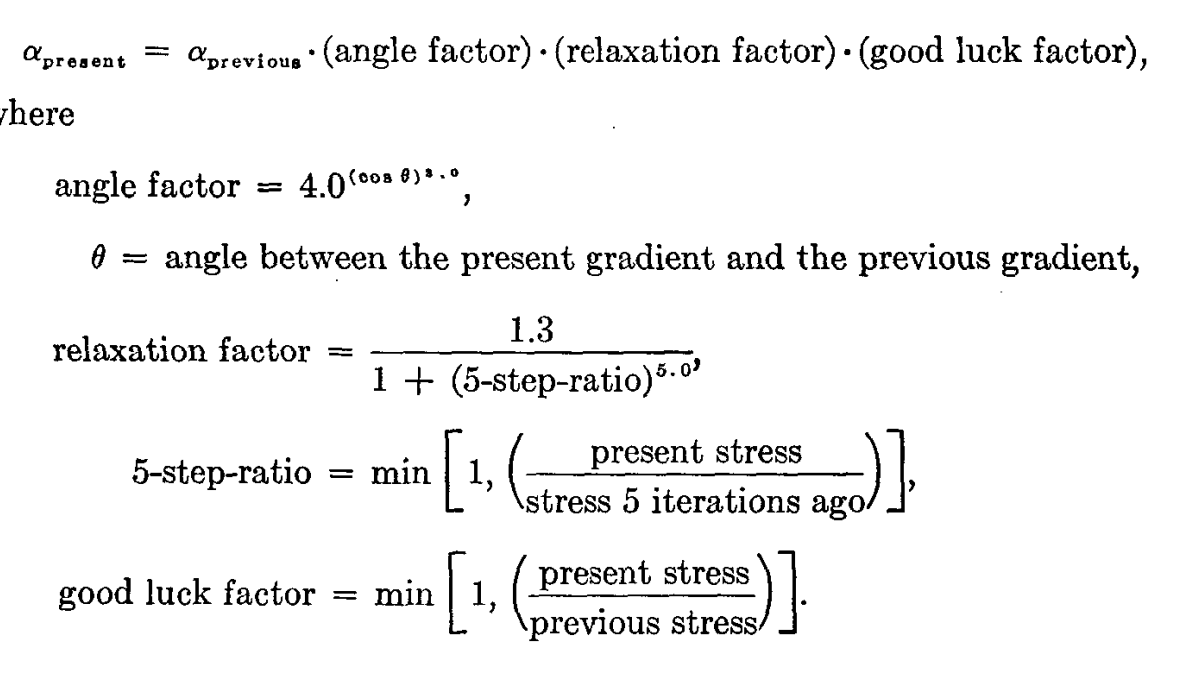

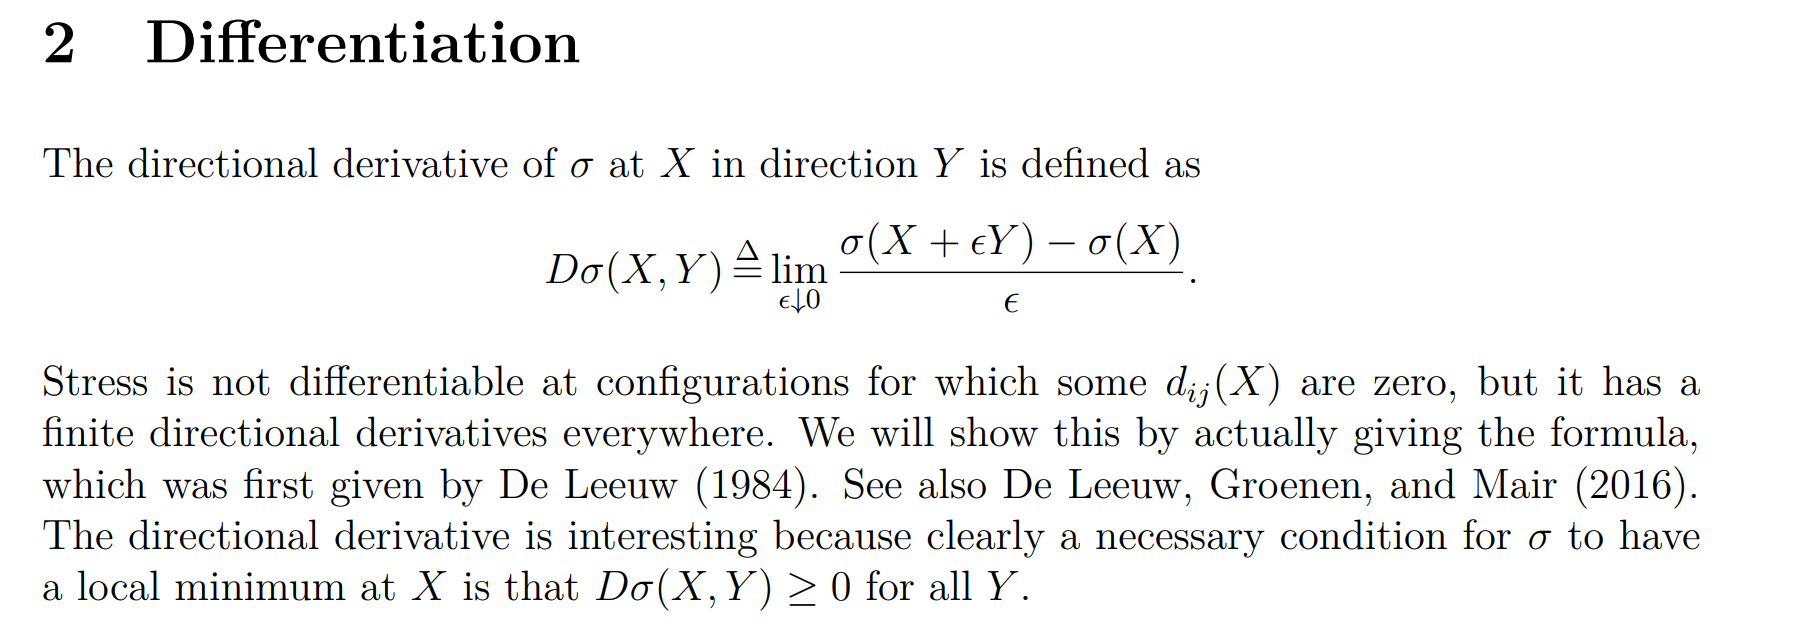
From https://jansweb.netlify.app/publication/deleeuw-e-18-c/

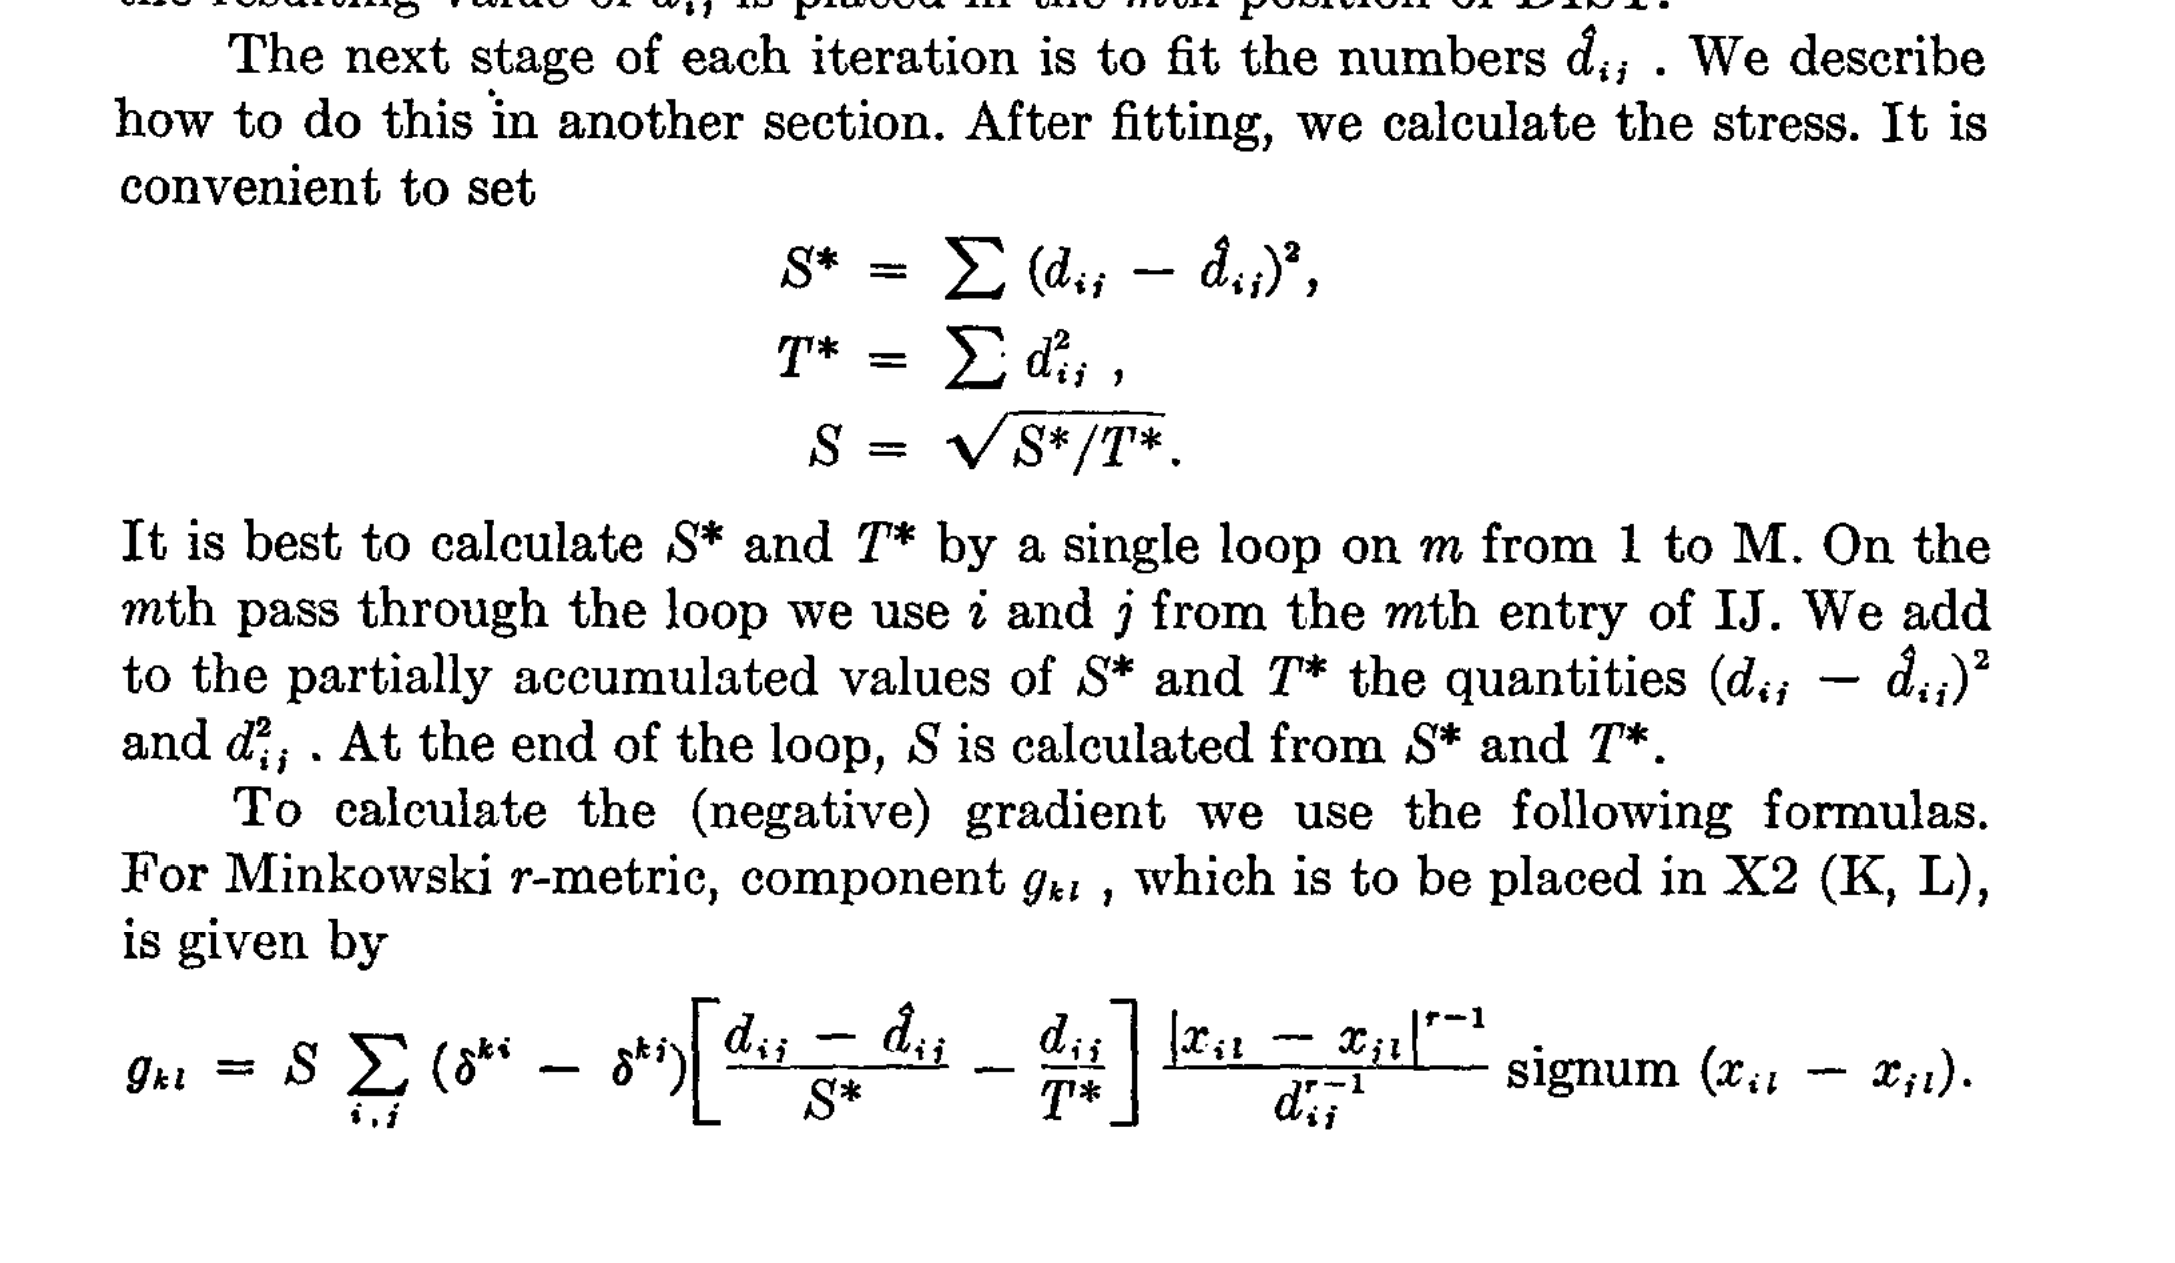
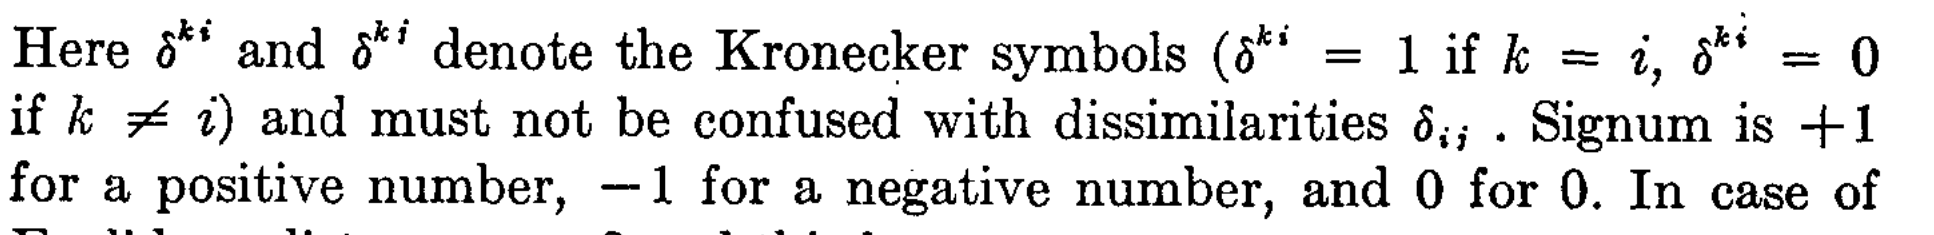
From Kruskal, 1964

In [5]:
morse_data 

,.-,-...,-.-.,-..,.,..-.,--.,....,..,.---,...,.----,..---,...--,....-,.....,-....,--...,---..,----.,-----
.-,0,167,169,159,180,164,163,163,75,165,...,172,167,170,170,166,167,166,172,178,174
-...,167,0,96,79,163,95,139,105,165,141,...,151,142,148,114,97,18,93,133,157,171
-.-.,169,96,0,141,166,115,137,144,162,115,...,148,139,121,143,152,115,122,112,137,158
-..,159,79,141,0,172,136,100,114,159,151,...,166,163,163,154,155,140,151,161,171,174
.,180,163,166,172,0,183,182,171,163,179,...,174,179,174,175,180,179,173,181,184,183
..-.,164,95,115,136,183,0,156,116,170,118,...,161,143,97,129,109,131,129,159,170,172
--.,163,139,137,100,182,156,0,163,172,135,...,146,152,165,155,172,164,152,141,147,159
....,163,105,144,114,171,116,163,0,158,157,...,164,164,146,117,40,126,151,166,170,174
..,75,165,162,159,163,170,172,158,0,171,...,173,152,169,166,170,171,167,178,178,177
.---,165,141,115,151,179,118,135,157,171,0,...,73,82,115,138,154,151,118,112,120,126


In [6]:
morseilarity_vec = np.tril(morse_data, -1)
dismorseilarities = morseilarity_vec[np.nonzero(morseilarity_vec)] + 0.
# dismorseilarities = np.exp(-1*morseilarity_vec)
dismorseilarities/= np.linalg.norm(dismorseilarities)

/usr/local/lib/python3.8/dist-packages/numpy/core/numeric.py:2443: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)


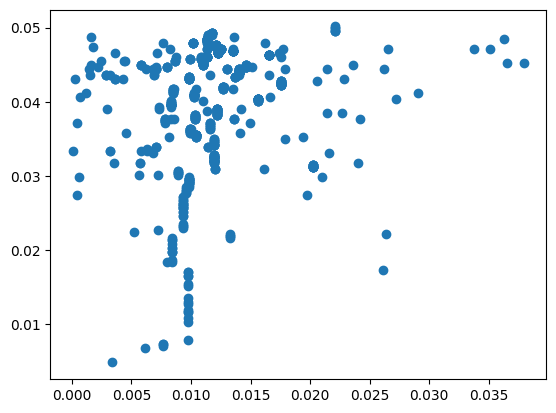

2022-08-26 05:16:46.512 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:46.514 | INFO     | src.autograd_mds:apply_mean:166 - [0.003348990661269734, 0.0061424809322525985, 0.007682724650787274, 0.007682724650787274, 0.007682724650787274, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.009745536236207112, 0.026140460951072, 0.007964821028563607, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.00836400258522292, 0.013306837003399123, 0.013306837003399123, 0.013306837003399123, 0.013306837003399123, 0.02638177773605998, 0.005176388781363063,

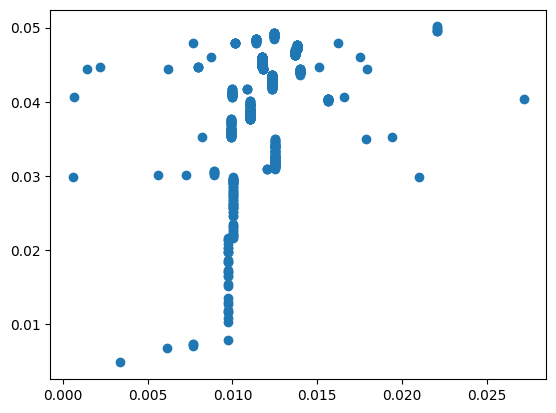

2022-08-26 05:16:47.265 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:47.267 | INFO     | src.autograd_mds:apply_mean:166 - [0.003348990661269734, 0.0061424809322525985, 0.007682724650787274, 0.007682724650787274, 0.007682724650787274, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.010039723155164177, 0.010039723155164177, 0.010039723155164177, 0.010039723155164177, 0.010039723155164177, 0.0100

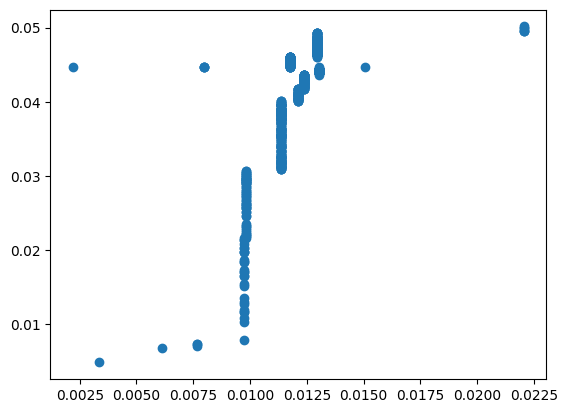

2022-08-26 05:16:47.682 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:47.684 | INFO     | src.autograd_mds:apply_mean:166 - [0.003348990661269734, 0.0061424809322525985, 0.007682724650787274, 0.007682724650787274, 0.007682724650787274, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009839846693478243, 0.009839846693478243, 0.009839846693478243, 0.009839846693478243, 0.009839846693478243, 0.0098

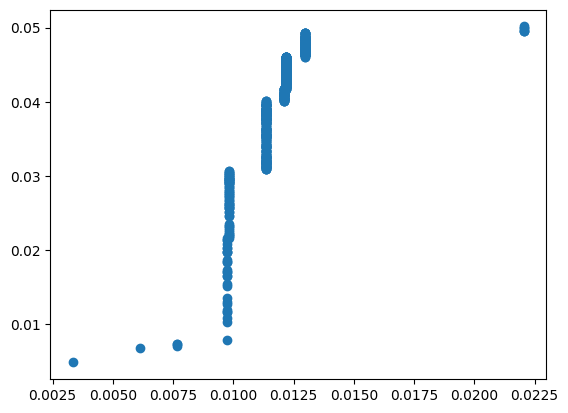

2022-08-26 05:16:47.924 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:47.925 | INFO     | src.autograd_mds:apply_mean:166 - [0.003348990661269734, 0.0061424809322525985, 0.007682724650787274, 0.007682724650787274, 0.007682724650787274, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009724726927149803, 0.009839846693478243, 0.009839846693478243, 0.009839846693478243, 0.009839846693478243, 0.009839846693478243, 0.0098

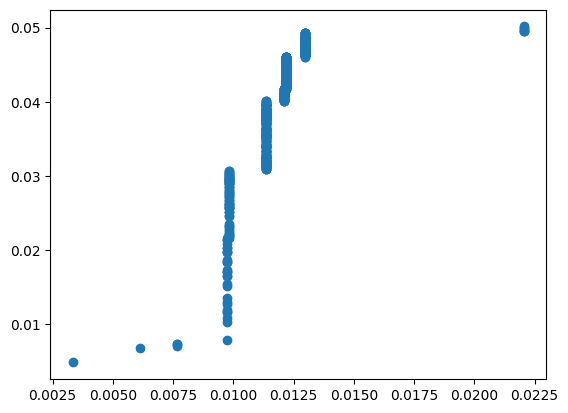

2022-08-26 05:16:48.129 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0027934902709828647, 0.0015402437185346755, 0.0, 0.0, 0.0020420022763625286, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00011511976632844027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015207494596883066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Sstar: 0.4991348975818052
Tstar: 1.0
stress: 0.7064947965709338
Sstar: Autograd ArrayBox with value 0.5604158235806775
Tstar: 1.0


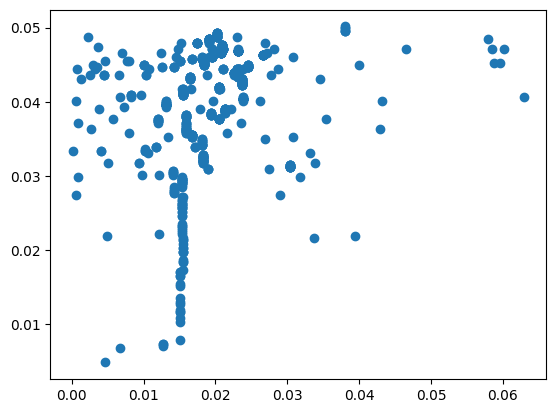

2022-08-26 05:16:53.087 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:53.089 | INFO     | src.autograd_mds:apply_mean:166 - [0.004644707191340103, 0.006762870546417535, 0.012636751843098723, 0.012636751843098723, 0.012636751843098723, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.03373199684946665, 0.039492364888690415, 0.004853300727293538, 0.012195828820290314, 0.015285804475953959, 0.015285

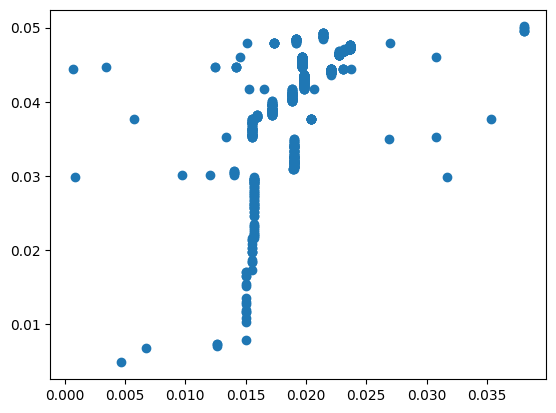

2022-08-26 05:16:53.835 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:53.836 | INFO     | src.autograd_mds:apply_mean:166 - [0.004644707191340103, 0.006762870546417535, 0.012636751843098723, 0.012636751843098723, 0.012636751843098723, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015528976571083153, 0.015723082681807696, 0.015723082681807696, 0.015723082681807696, 0.015723082681807696, 0.015723082681807696, 0.01572

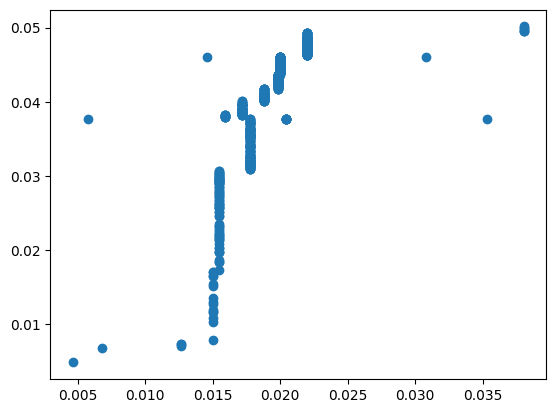

2022-08-26 05:16:54.256 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:54.257 | INFO     | src.autograd_mds:apply_mean:166 - [0.004644707191340103, 0.006762870546417535, 0.012636751843098723, 0.012636751843098723, 0.012636751843098723, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.01544

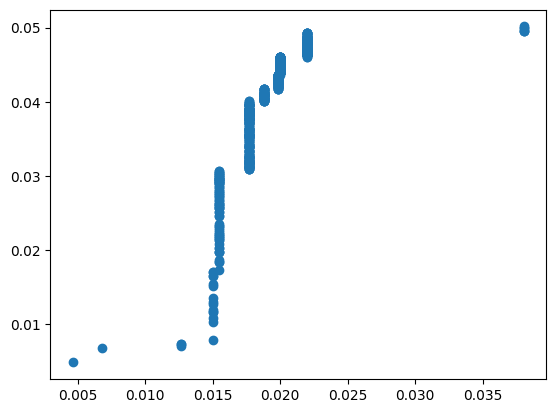

2022-08-26 05:16:54.498 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:54.499 | INFO     | src.autograd_mds:apply_mean:166 - [0.004644707191340103, 0.006762870546417535, 0.012636751843098723, 0.012636751843098723, 0.012636751843098723, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015041820868616943, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.015444087621085692, 0.01544

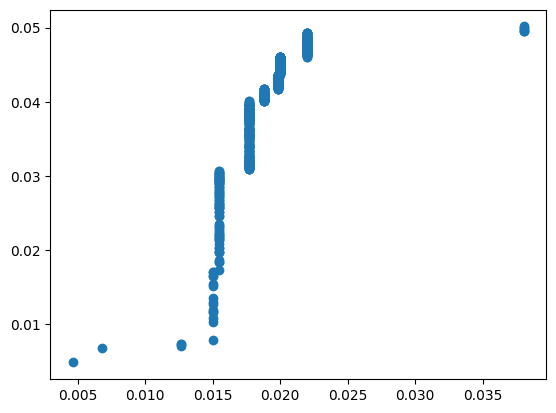

2022-08-26 05:16:54.667 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.002118163355077432, 0.0058738812966811875, 0.0, 0.0, 0.0024050690255182205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00040226675246874885, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0022455265880135175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Sstar: 0.2765522826395825
Tstar: 1.0
stress: 0.5258823847968123
Sstar: Autograd ArrayBox with value 0.4232597440548034
Tstar: 1.0


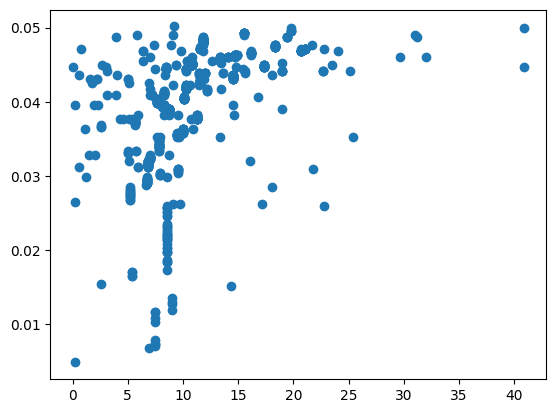

2022-08-26 05:16:58.444 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:58.446 | INFO     | src.autograd_mds:apply_mean:166 - [0.1905546332710883, 6.952577371906864, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 8.995131821745089, 8.995131821745089, 8.995131821745089, 8.995131821745089, 14.3294365435525, 2.581300516932756, 5.398684569982003, 5.398684569982003, 5.398684569982003, 5.398684569982003, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.513185530064543, 8.51318

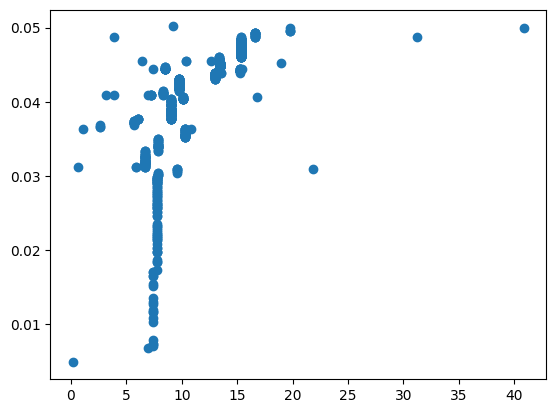

2022-08-26 05:16:59.287 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:59.288 | INFO     | src.autograd_mds:apply_mean:166 - [0.1905546332710883, 6.952577371906864, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.808350606733344, 7.8083

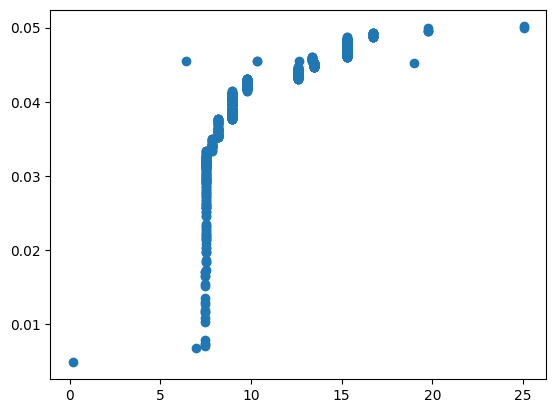

2022-08-26 05:16:59.712 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:16:59.713 | INFO     | src.autograd_mds:apply_mean:166 - [0.1905546332710883, 6.952577371906864, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.5274

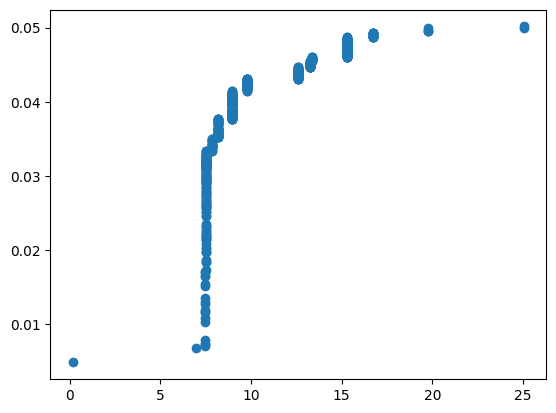

2022-08-26 05:17:00.014 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:17:00.016 | INFO     | src.autograd_mds:apply_mean:166 - [0.1905546332710883, 6.952577371906864, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.440731281343053, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.448600262739362, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.527442045929471, 7.5274

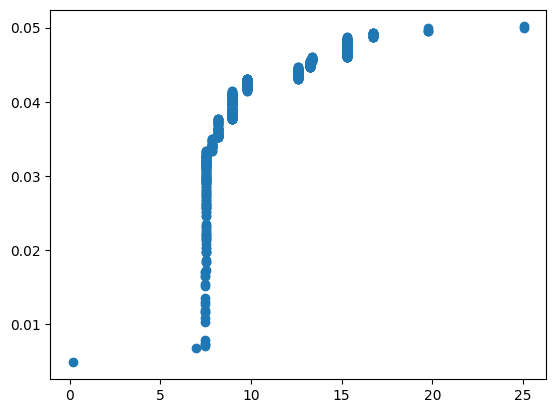

2022-08-26 05:17:00.181 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[6.762022738635776, 0.4881539094361891, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007868981396308428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07884178319010893, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.34314556991763734, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3319

Sstar: 79742.94622855648
Tstar: 1.0
stress: 282.3879356993788
Sstar: Autograd ArrayBox with value 123763.36872380169
Tstar: 1.0


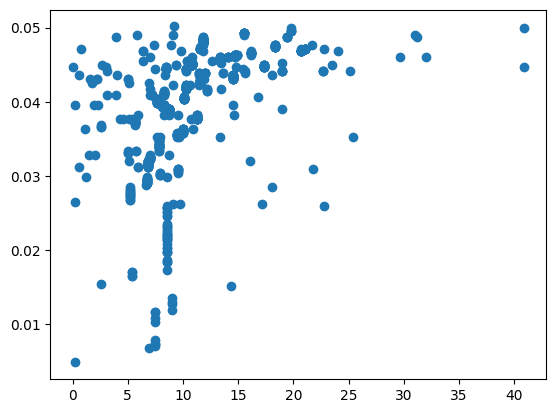

2022-08-26 05:17:04.296 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:17:04.298 | INFO     | src.autograd_mds:apply_mean:166 - [0.19055463326976763, 6.9525773718367, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 8.995131821666519, 8.995131821666519, 8.995131821666519, 8.995131821666519, 14.329436543432426, 2.5813005168999257, 5.398684569940442, 5.398684569940442, 5.398684569940442, 5.398684569940442, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513185529984447, 8.513

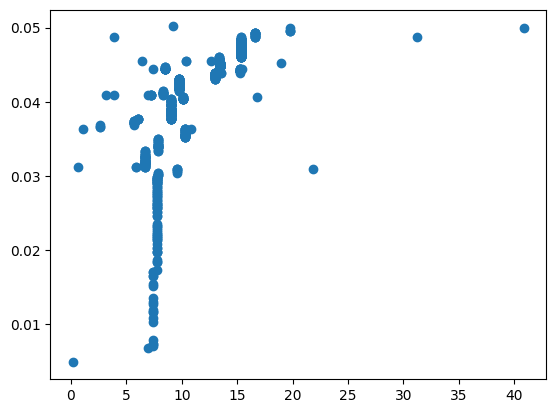

2022-08-26 05:17:05.205 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:17:05.206 | INFO     | src.autograd_mds:apply_mean:166 - [0.19055463326976763, 6.9525773718367, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.808350606661242, 7.80835060666124

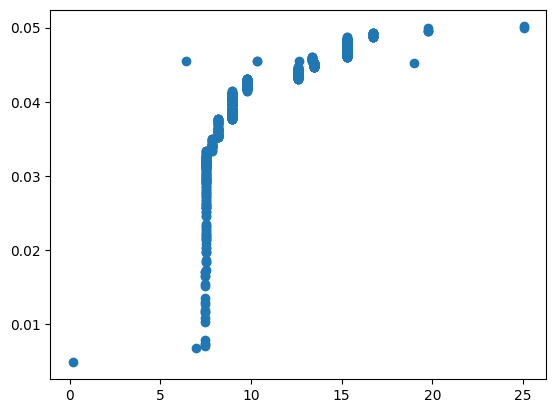

2022-08-26 05:17:05.593 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:17:05.596 | INFO     | src.autograd_mds:apply_mean:166 - [0.19055463326976763, 6.9525773718367, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.52744204586153

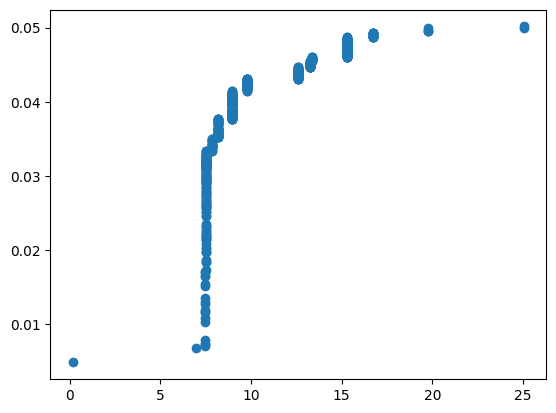

2022-08-26 05:17:05.916 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:17:05.917 | INFO     | src.autograd_mds:apply_mean:166 - [0.19055463326976763, 6.9525773718367, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.440731281277352, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.4486002626760195, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.527442045861537, 7.52744204586153

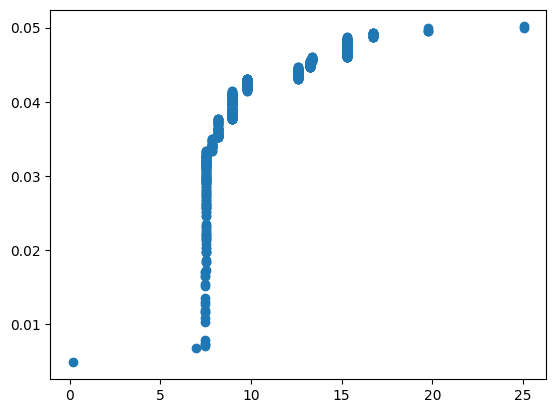

2022-08-26 05:17:06.131 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[6.762022738566932, 0.4881539094406522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00786898139866743, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07884178318551793, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.343145569915003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3319496

Sstar: 79742.94622685322
Tstar: 1.0
stress: 282.38793569636294
Sstar: Autograd ArrayBox with value 123763.36872110478
Tstar: 1.0


In [7]:
morse_config = my_mds_training_loop(dismorseilarities, n_init=1, eps=1e-2)

In [8]:
refMDS = MDS(dissimilarity="precomputed",metric=False,n_init=50)

In [9]:
promorse_config = refMDS.fit_transform(morse_data)

In [10]:
promorse_config /= np.sqrt((promorse_config**2).sum())
morse_config /= np.sqrt((morse_config**2).sum())
# Rotate the data
clf = PCA(n_components=2)



promorse_config = clf.fit_transform(promorse_config)
morse_config = clf.fit_transform(morse_config)

fig, ax = plt.subplots(2,1, figsize=(16,32), dpi=600)
ax[0].scatter(x=morse_config[:,0], y=morse_config[:,1])
for i, label in enumerate(morse_data.index.to_list()):
       ax[0].annotate(label, (morse_config[i,0], morse_config[i,1]), fontsize=16)


ax[1].scatter(x=promorse_config[:,0], y=promorse_config[:,1], color='red')
for i, label in enumerate(morse_data.index.to_list()):
       ax[1].annotate(label, (promorse_config[i,0], promorse_config[i,1]), fontsize=16)

# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()

In [11]:
promorse_config /= np.sqrt((promorse_config**2).sum())
morse_config /= np.sqrt((morse_config**2).sum())
# Rotate the data
clf = PCA(n_components=2)



promorse_config = clf.fit_transform(promorse_config)
morse_config = clf.fit_transform(morse_config)

fig, ax = plt.subplots(1,1, figsize=(16,32), dpi=600)
ax.scatter(x=morse_config[:,0], y=morse_config[:,1])
for i, label in enumerate(morse_data.index.to_list()):
       ax.annotate(label, (morse_config[i,0], morse_config[i,1]), fontsize=16)


ax.scatter(x=promorse_config[:,0], y=promorse_config[:,1], color='red')
for i, label in enumerate(morse_data.index.to_list()):
       ax.annotate(label, (promorse_config[i,0], promorse_config[i,1]), fontsize=16)

# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()